<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Curve-fits-for-the-collisional-rates-in-Argon" data-toc-modified-id="Curve-fits-for-the-collisional-rates-in-Argon-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Curve fits for the collisional rates in Argon</a></span><ul class="toc-item"><li><span><a href="#Electron-collisions" data-toc-modified-id="Electron-collisions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Electron collisions</a></span><ul class="toc-item"><li><span><a href="#Plot-the-momentum-transfer-cross-sections" data-toc-modified-id="Plot-the-momentum-transfer-cross-sections-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Plot the momentum transfer cross-sections</a></span></li><li><span><a href="#Plot-the-average-rate-integrated-over-a-Maxwellian" data-toc-modified-id="Plot-the-average-rate-integrated-over-a-Maxwellian-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Plot the average rate integrated over a Maxwellian</a></span></li></ul></li></ul></li><li><span><a href="#Write-the-file" data-toc-modified-id="Write-the-file-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Write the file</a></span></li></ul></div>

# Curve fits for the collisional rates in Argon

In [1]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams["font.family"] = 'Times New Roman'
plt.rcParams["font.weight"] = 'normal'
plt.rcParams['figure.facecolor'] = 'white'

import numpy as np

import scipy.constants as phy_const
from scipy import integrate
from scipy import interpolate

from scipy.optimize import curve_fit 
import sys
np.set_printoptions(threshold=np.inf)

plt.rcParams["font.family"]   = 'Times New Roman'
plt.rcParams["font.size"] = 15
plt.rcParams["lines.linewidth"] = 2

We read the collisions used by the PIC simulation. We define the momentum transfer cross-section, as follows

$$ \sigma_m = 2\pi \int^\pi_0  (1 - cos \theta) I(v, \theta) \sin \theta d \theta, $$

where 

$$ I(v, \theta) = \frac{b}{\sin \theta} \left| \frac{db}{d \theta} \right|. $$

Here, $I(v, \theta)$ is the differential cross-section, b is the impact paramiter, and $\theta$ is the scattering angle

We define a class that compute the methods for the cross-section

In [2]:
import sys  
import os
import numpy as np

# IMPORT PATH TO PYTHONTOOLS MODULE"
sys.path.append('../src/CollisionalData')

import CrossSection as CS

## Electron collisions

In [11]:
# SIGLO  collisions

pathRates = '/Users/alvarez/Documents/1_Simulation/2_MUFFIN/src/CollisionalData/CrossSections/ArReducedSiglo/'

sigma_ee_el    = CS.CrossSection("e-e", mechanism='e-e', density = 1e18, temperature = 3)
sigma_en_el    = CS.CrossSection("Ar-e (Elastic)", potential=0.)
sigma_en_eff   = CS.CrossSection("Ar-e (Eff.)", potential=0.)
sigma_en_iz    = CS.CrossSection("Ar-e (Ioniz.)", potential=15.8)
sigma_en_exc_1 = CS.CrossSection("Ar-e (11.5 eV)", potential=11.5)


sigma_en_el.readData(pathRates + "Ar_e_ELASTIC_CROSS_SECTION.txt")
# sigma_en_eff.readData(pathRates + "Ar_e_ELASTIC_CONSTANTRATE_CROSS_SECTION.txt")
sigma_en_eff.readData(pathRates + "Ar_e_EFFECTIVE.txt")

sigma_en_iz.readData(pathRates + "Ar_e_IONIZATION_CROSS_SECTION.txt")
sigma_en_exc_1.readData(pathRates + "Ar_e_EXCITATION_11_55_CROSS_SECTION.txt")

crossSections = [sigma_ee_el, sigma_en_el , sigma_en_eff, sigma_en_iz , sigma_en_exc_1]

### Plot the momentum transfer cross-sections

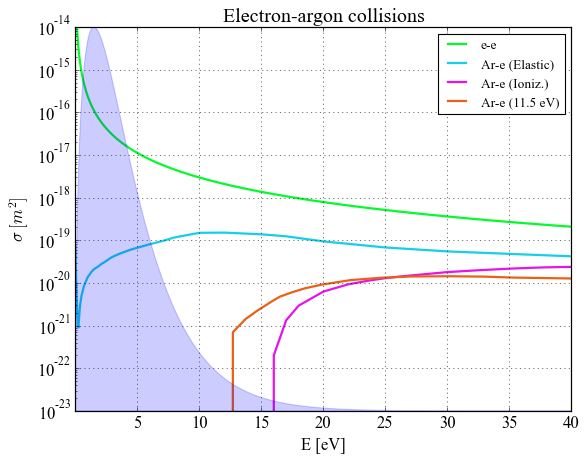

In [30]:
# Plot the data
f, ax = plt.subplots()

crossSections = [sigma_ee_el, sigma_en_el , sigma_en_iz , sigma_en_exc_1]

for crossSection in crossSections:
    crossSection.plotSigma(ax)
    
    
    
ax2 = ax.twinx() 
ax2.set_yticklabels([])
ax2.set_yticks([])

EEDF = np.exp(-phy_const.m_e*sigma_ee_el.Velocity**2/(2*phy_const.e*3))*np.sqrt(sigma_ee_el.Energy)
ax2.plot(sigma_ee_el.Energy,EEDF, linestyle='None')
ax2.fill_between(
        x= sigma_ee_el.Energy, 
        y1= EEDF, 
        y2= np.zeros_like(EEDF),
        color= "b",
        alpha= 0.2)
ax.set_ylabel(r'$\sigma$ $[m^{2}]$')
ax.set_xlabel('E [eV]')
ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_ylim([1e-25, 1e-15])
ax.set_xlim([1e-2, 40])
ax.set_ylim([1e-23, 1e-14])
ax.legend(loc = 'best', fontsize = 12)
plt.title('Electron-argon collisions')

ax.grid(True)

# plt.savefig("./crossSections_elec.pdf", bbox_inches='tight')

plt.show()

In [12]:
# from scipy.interpolate import interp1d

# # Plot the data
# f, ax = plt.subplots()

# #ax.plot(sigma_ee_el.Energy, sigma_ee_el.Sigma)

# def computeSigma(vel, coll):
#     sigma_interp = interp1d(coll.Velocity, coll.Sigma, fill_value=(0.,coll.Sigma[-1]), bounds_error=False)   
#     return sigma_interp(vel)

# import scipy.constants as phy_const

# sigma_en_el.plotSigma(ax)
# sigma_en_el_biagi.plotSigma(ax)
# # # sigma_ee_el.plotSigma(ax)
# # # sigma_ei_el.plotSigma(ax)
# sigma_en_exc_1.plotSigma(ax)
# # # sigma_en_exc_2.plotSigma(ax)
# # # sigma_en_exc_3.plotSigma(ax)
# sigma_en_iz.plotSigma(ax)

# vel_interpol = np.logspace(2, np.log10(sigma_en_el.Velocity[-1]), num=1000)
# print(vel_interpol)
# print(sigma_en_el.Velocity)
# Energy_interpol = vel_interpol**2*phy_const.m_e/(2*phy_const.e)

# sigma_en_el_interp = computeSigma(vel_interpol, sigma_en_el)
# sigma_en_exc_1_interp = computeSigma(sigma_en_el.Velocity, sigma_en_exc_1)
# sigma_en_iz_interp    = computeSigma(sigma_en_el.Velocity, sigma_en_iz)

# ax.plot(Energy_interpol, sigma_en_el_interp,'--', label='interpol.')
# ax.plot(sigma_en_el.Energy, sigma_en_exc_1_interp,'--', label='interpol.')
# ax.plot(sigma_en_el.Energy, sigma_en_iz_interp,'--', label='interpol.')
# ax.plot(sigma_en_el.Energy, 2e-13/sigma_en_el.Velocity, label='constant rate')

# ax.set_ylabel(r'$\sigma$ $[m^{2}]$')
# ax.set_xlabel('E [eV]')
# ax.set_yscale('log')
# ax.set_xscale('log')
# # ax.set_ylim([1e-25, 1e-15])
# # ax.set_xlim([1e-2, 1000])
# plt.legend(loc = 'best', fontsize = 12)
# plt.title('Electron-argon collisions')

# ax.grid(True)

# # plt.savefig("./crossSections_elec.pdf", bbox_inches='tight')

# plt.show()

# # for i, energ in enumerate(sigma_en_el.Energy):
# #     print(" "+str("%.6e" % sigma_en_el.Energy[i])+"\t"+str("%.6e" % (sigma_en_el.Sigma[i] - sigma_en_exc_1_interp[i] - sigma_en_iz_interp[i])))
# # for i, energ in enumerate(sigma_en_el.Energy):
# #      print(" "+str("%.6e" % sigma_en_el.Energy[i])+"\t"+str("%.6e" % (2e-13/sigma_en_el.Velocity[i])))
# # for i, energ in enumerate(sigma_en_el.Energy):
# #      print(" "+str("%.6e" % sigma_en_el.Energy[i])+"\t"+str("%.6e" % (1e-19)))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


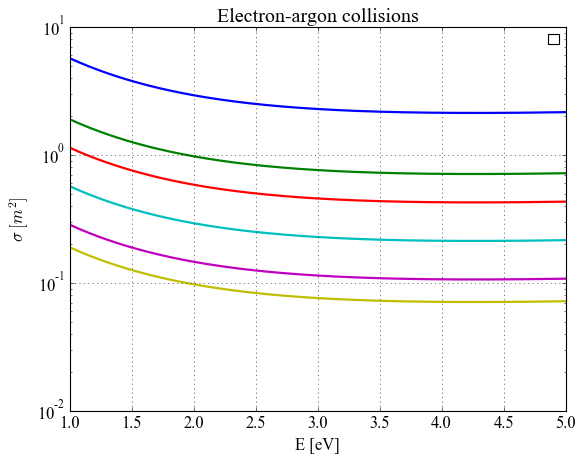

In [76]:
# Compute the rates
def chooseColor(i,nbFiles,cmap = 'plasma'):
    cmap = plt.cm.get_cmap(cmap)
    rgba = cmap((i+1)/(nbFiles)) # To avoid the first value that is very clear
    return rgba

sigma_en_el.computeOmega11()
sigma_en_el.computeRate()

v_mean = np.sqrt(sigma_en_el.Temperature*phy_const.e*8/(np.pi*phy_const.m_e))


# p_gas = np.array([0.1, 0.5, 1, 5., 10])
p_gas   = [1, 3, 5, 10, 20, 30]
T_gas = 300.
n_gas = np.array(p_gas)*0.133/(T_gas*phy_const.Boltzmann)



f, ax = plt.subplots()


for i, ngas in enumerate(n_gas):
    Sigma_en = 16./3.*sigma_en_el.Omega11/v_mean
#     Sigma_en = sigma_en_el.K/v_mean
    Kn_eg    = (1./(ngas*Sigma_en))/0.1
#     color_eg = chooseColor(i, len(p_gas_arr+10),cmap = 'Greens')

    ax.plot(sigma_en_el.Temperature, Kn_eg)
    
ax.set_ylabel(r'$\sigma$ $[m^{2}]$')
ax.set_xlabel('E [eV]')
ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_ylim([1e-25, 1e-15])
# ax.set_xlim([1e-2, 40])
ax.set_xlim([1, 5])
ax.legend(loc = 'best', fontsize = 12)
plt.title('Electron-argon collisions')

ax.grid(True)
    

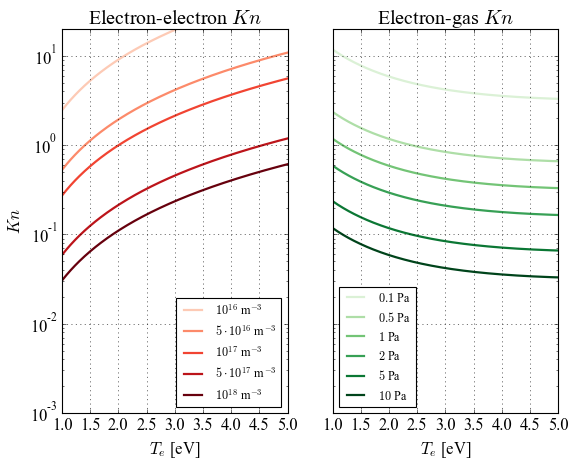

In [98]:
def chooseColor(i,nbFiles,cmap = 'plasma'):
    cmap = plt.cm.get_cmap(cmap)
    rgba = cmap((i+1)/(nbFiles)) # To avoid the first value that is very clear
    return rgba

# Conditions
n_e_arr     = []
n_e_arr     = [1e16, 5e16, 1e17, 5e17, 1e18]
n_e_label   = ['$10^{16}$ m$^{-3}$', '$5\cdot10^{16}$ m$^{-3}$', '$10^{17}$ m$^{-3}$', '$5\cdot10^{17}$ m$^{-3}$', '$10^{18}$ m$^{-3}$']
p_gas_arr   = [0.1, 0.5, 1, 2., 5., 10.]
p_gas_label = ['$0.1$ Pa', '$0.5$ Pa', '$1$ Pa', '$2$ Pa', '$5$ Pa', '$10$ Pa']


n_gas = []
T_gas        = 300

Temperatures = sigma_ee_el.Temperature
Sigma_ee = np.zeros_like(sigma_ee_el.Temperature)
Sigma_en = np.zeros_like(sigma_ee_el.Temperature)
l_ee     = []
color_ee = []
color_eg = []
l_en     = []

# Taking the rate
vel_e        = np.sqrt(8*phy_const.e*Temperatures/(np.pi*phy_const.m_e))
u_Bohm       = np.sqrt(phy_const.Boltzmann*T_gas/(phy_const.m_u*39.948))
for i_n_e, n_e in enumerate(n_e_arr):
    sigma_ee_el  = CS.CrossSection("e-e", mechanism='e-e', density = n_e)
    sigma_ee_el.computeRate()
    l_ee_Temp = np.zeros_like(sigma_ee_el.Temperature)
    for i, T in enumerate(sigma_ee_el.Temperature):
        vg2           = (8*phy_const.e*T/(np.pi*phy_const.m_e)) 
        b0Ovg2        = (phy_const.e**2/(4*np.pi*phy_const.epsilon_0*phy_const.m_e/2))
        T_e           = T
        rD2           = phy_const.epsilon_0*T_e/(n_e*phy_const.e)
        #Lambda        = np.sqrt(rD2)*vg2/b0Ovg2
        Lambda        = np.sqrt(rD2)*12*T_e*np.pi*phy_const.epsilon_0/phy_const.e
#         Sigma         = 2*np.pi*(b0Ovg2/self.Velocity**2)**2*np.log(1 + (rD2*self.Velocity**4/b0Ovg2**2))
#         Beta_e_Half   = phy_const.m_e/(2*phy_const.e*T_e)/2
#         functional    = np.exp(-Beta_e_Half*self.Velocity**2)*self.Velocity*self.Sigma*4*np.pi*self.Velocity**2
#         self.K[i]     = integrate.trapz(functional, x= self.Velocity)*(1/np.pi*Beta_e_Half)**(3/2)
        l_ee_Temp[i]  = 4*np.pi*phy_const.epsilon_0**2*T_e**2/(n_e*phy_const.e**2*np.log(Lambda))

#         rD    = np.sqrt(phy_const.epsilon_0*T/(n_e*phy_const.e))
#         g2_av = 3*phy_const.e*T/(phy_const.m_e/2)
#         b0av  = phy_const.e**2/(2*np.pi*phy_const.epsilon_0*phy_const.m_e/2*g2_av)
#         logLandau = np.log(rD/b0av)
# #         tau_0       = 8*np.pi*(np.sqrt(2))*phy_const.epsilon_0**2*np.sqrt(phy_const.m_e)*(phy_const.e*T)**(3./2.)/(logLandau*n_e*phy_const.e**4)

#         tau_0 = n_e*16.*np.sqrt(np.pi)/3.*(phy_const.m_e/(4.*phy_const.e*T))**(3./2.)*(2*phy_const.e**2/(4.*np.pi*phy_const.epsilon_0*phy_const.m_e))**2.*logLandau
#         l_ee_Temp[i] = np.sqrt(vg2)/tau_0
    l_ee.append(l_ee_Temp)
    
    color_ee.append(chooseColor(i_n_e, len(n_e_arr),cmap = 'Reds'))


sigma_en_el.computeRate()

for i_p_gas, p_gas in enumerate(p_gas_arr):
    n_gas = p_gas/(phy_const.Boltzmann*T_gas)
    Sigma_en = sigma_en_el.K/vel_e
    l_en_array = 1./(n_gas*Sigma_en[:])
    l_en.append(l_en_array)
    color_eg.append(chooseColor(i_p_gas, len(p_gas_arr),cmap = 'Greens'))


    
f, ax = plt.subplots(1,2)

for i_n_e, n_e in enumerate(n_e_arr):
    ax[0].title.set_text('Electron-electron $Kn$')
    ax[0].plot(Temperatures, l_ee[i_n_e]/0.13, color=color_ee[i_n_e], label=n_e_label[i_n_e])#, label=pressures[i_file])
for i_p_gas, p_gas in enumerate(p_gas_arr):
    ax[1].title.set_text('Electron-gas $Kn$')
    ax[1].plot(Temperatures, l_en[i_p_gas]/0.13, color=color_eg[i_p_gas], label=p_gas_label[i_p_gas])#, linestyle = 'none', marker = 'o', markersize=5, markevery = 10)

# ax[0].plot(Temperatures, np.ones_like(Temperatures)*0.1, color='b',linestyle='--')
# ax[0].text(9, 0.05, '$L$', color='b')
ax[0].set_ylabel('$Kn$')

# ax[1].plot(Temperatures, np.ones_like(Temperatures)*0.1, color='b',linestyle='--')
# ax[1].text(9, 0.12, '$L$', color='b')

for axis in ax:
    axis.set_yscale('log')
    axis.set_xlim([1., 5])
    axis.set_ylim([1e-3, 2e1])
    axis.set_xlabel('$T_e$ [eV]')
    axis.grid()
    axis.legend(fontsize = 11, loc = 'lower right')
ax[1].legend(fontsize = 11, loc = 'lower left')
ax[1].set_yticklabels([])   
# plt.tight_layout()
#plt.savefig('../0_Paper/Figures/meanFreePath.pdf')
plt.show()


### Plot the average rate integrated over a Maxwellian

We compute the rate as:

$$ K = \left(\frac{m_e}{2\pi k_B T_e} \right)^{3/2} \int^\infty_0 4\pi c_e^2\sigma \exp\left(-\frac{m_e  c_e^2}{2 k_B T_e}\right) dc_{e}. $$

In [5]:
MeanEnergy = np.linspace(0.05,20, 400)
print(MeanEnergy)

[ 0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55  0.6
  0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05  1.1   1.15  1.2
  1.25  1.3   1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75  1.8
  1.85  1.9   1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35  2.4
  2.45  2.5   2.55  2.6   2.65  2.7   2.75  2.8   2.85  2.9   2.95  3.
  3.05  3.1   3.15  3.2   3.25  3.3   3.35  3.4   3.45  3.5   3.55  3.6
  3.65  3.7   3.75  3.8   3.85  3.9   3.95  4.    4.05  4.1   4.15  4.2
  4.25  4.3   4.35  4.4   4.45  4.5   4.55  4.6   4.65  4.7   4.75  4.8
  4.85  4.9   4.95  5.    5.05  5.1   5.15  5.2   5.25  5.3   5.35  5.4
  5.45  5.5   5.55  5.6   5.65  5.7   5.75  5.8   5.85  5.9   5.95  6.
  6.05  6.1   6.15  6.2   6.25  6.3   6.35  6.4   6.45  6.5   6.55  6.6
  6.65  6.7   6.75  6.8   6.85  6.9   6.95  7.    7.05  7.1   7.15  7.2
  7.25  7.3   7.35  7.4   7.45  7.5   7.55  7.6   7.65  7.7   7.75  7.8
  7.85  7.9   7.95  8.    8.05  8.1   8.15  8.2   8.25  8.3   8.35

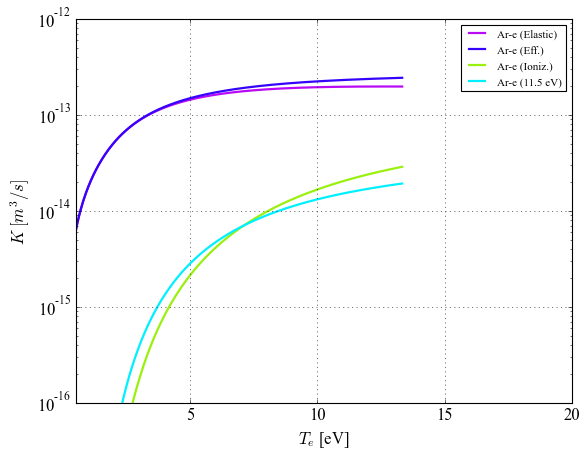

In [6]:
for crossSection in crossSections:
    crossSection.Temperature = 2./3.*MeanEnergy
    crossSection.K           = np.zeros_like(MeanEnergy) # Initialize the array
    crossSection.Omega11     = np.zeros_like(MeanEnergy) # Initialize the array
    crossSection.Omega12     = np.zeros_like(MeanEnergy) # Initialize the array
    crossSection.Omega13     = np.zeros_like(MeanEnergy) # Initialize the array
    crossSection.Omega14     = np.zeros_like(MeanEnergy) # Initialize the array


# Plot the data
f, ax = plt.subplots()

# Compute the rates
for crossSection in crossSections:
    crossSection.computeRate()
    crossSection.plotRate(ax)

ax.set_ylabel(r'$K$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([0.5, 20])
ax.set_ylim([1e-16, 1e-12])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)

#plt.savefig("./AverageRate_elec.pdf", bbox_inches='tight')

plt.show()

import csv

with open("./Rates_el_Siglo.csv",'a') as file:
    header = ["T_e", "E", "K_eff", "K_iz", "K_exc"]
    writer = csv.writer(file, delimiter='\t',lineterminator='\n',)
    writer.writerow(header)
    for i_Temp, Temp in enumerate(sigma_en_iz.Temperature):
        line = [Temp, 3./2.*sigma_en_iz.Temperature[i_Temp], sigma_en_eff.K[i_Temp], sigma_en_iz.K[i_Temp], sigma_en_exc_1.K[i_Temp]]
        writer = csv.writer(file, delimiter='\t',lineterminator='\n',)
        writer.writerow(line)

print()

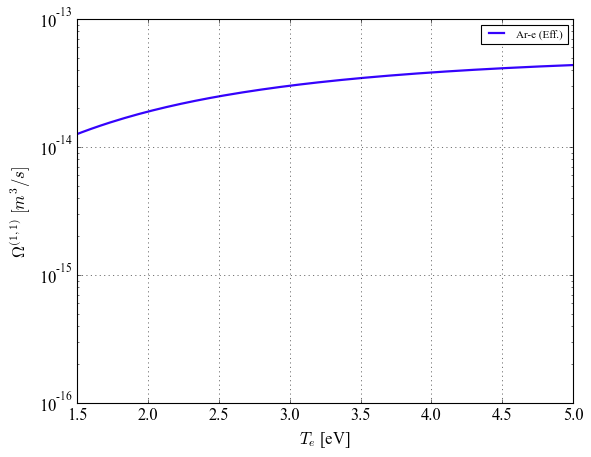

In [7]:
sigma_en_eff.computeOmega11()


f, ax = plt.subplots()

sigma_en_eff.plotOmega11(ax)

ax.set_ylabel(r'$\Omega^{(1,1)}$ $[m^{3}/s]$')
ax.set_xlabel(r'$T_e$ [eV]')
ax.set_yscale('log')
ax.set_xlim([1.5, 5])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)


plt.show()


In [8]:
import scipy.constants as phy_const

m_e  = phy_const.m_e
e    = phy_const.e
m_Ar = 39.948*phy_const.m_u

phi_iz  = sigma_en_iz.potential
phi_exc = sigma_en_exc_1.potential 
T_g     = phy_const.Boltzmann*300/e

# print(sigma_en_el.Temperature)

In [9]:
Source_energy = sigma_en_iz.K*phi_iz + sigma_en_exc_1.K*phi_exc + 16.*m_e/m_Ar*sigma_en_eff.Omega11*(sigma_en_eff.Temperature - T_g)

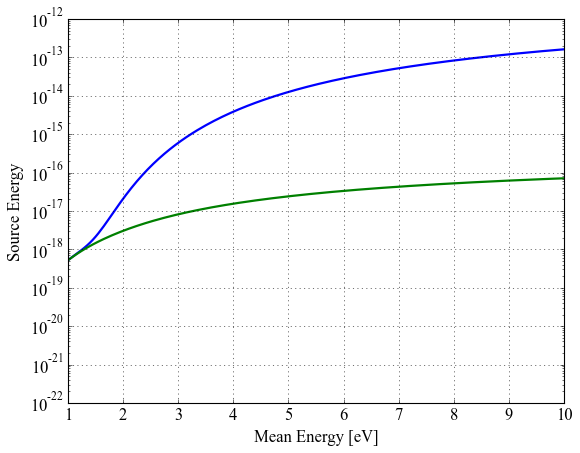

In [10]:
f, ax = plt.subplots()

ax.plot(3./2.*sigma_en_eff.Temperature, Source_energy)
ax.plot(3./2.*sigma_en_eff.Temperature, 16.*m_e/m_Ar*sigma_en_eff.Omega11*(sigma_en_eff.Temperature - T_g))
ax.set_ylabel(r'Source Energy')
ax.set_xlabel(r'Mean Energy [eV]')
ax.set_yscale('log')
ax.set_xlim([1., 10])
# plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
# plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11_elec.pdf", bbox_inches='tight')



plt.show()

# print('Source Energy = ', Source_energy)

In [112]:
mu_LF      = [0.142E+27, 0.1737E+27, 0.1725E+27, 0.1548E+27, 0.1261E+27, 0.9511E+26, 0.7069E+26, 0.5413E+26, 0.4300E+26, 0.3525E+26, 0.2967E+26, 0.2550E+26, 0.2228E+26, 0.1975E+26, 0.1771E+26, 0.1604E+26, 0.1465E+26, 0.1348E+26, 0.1246E+26, 0.1158E+26, 0.1080E+26, 0.1010E+26, 0.9476E+25, 0.8909E+25, 0.8392E+25, 0.7920E+25, 0.7487E+25, 0.7090E+25, 0.6724E+25, 0.6386E+25, 0.6075E+25, 0.5787E+25, 0.5521E+25, 0.5275E+25, 0.5046E+25, 0.4834E+25, 0.4636E+25, 0.4451E+25, 0.4279E+25, 0.4118E+25, 0.3967E+25, 0.3825E+25, 0.3692E+25, 0.3567E+25, 0.3448E+25, 0.3336E+25, 0.3231E+25, 0.3130E+25, 0.3035E+25, 0.2945E+25, 0.2859E+25, 0.2777E+25, 0.2699E+25, 0.2624E+25, 0.2553E+25, 0.2485E+25, 0.2419E+25, 0.2357E+25, 0.2296E+25, 0.2239E+25, 0.2183E+25, 0.2129E+25, 0.2078E+25, 0.2028E+25, 0.1980E+25, 0.1933E+25, 0.1888E+25, 0.1845E+25, 0.1803E+25, 0.1762E+25, 0.1723E+25, 0.1685E+25, 0.1648E+25, 0.1612E+25, 0.1578E+25, 0.1544E+25, 0.1511E+25, 0.1480E+25, 0.1449E+25, 0.1420E+25, 0.1391E+25, 0.1363E+25, 0.1336E+25, 0.1310E+25, 0.1285E+25, 0.1261E+25, 0.1238E+25, 0.1215E+25, 0.1194E+25, 0.1174E+25, 0.1154E+25, 0.1136E+25, 0.1118E+25, 0.1102E+25, 0.1087E+25, 0.1074E+25, 0.1062E+25, 0.1051E+25, 0.1042E+25, 0.1036E+25, 0.1031E+25, 0.1029E+25, 0.1030E+25, 0.1034E+25, 0.1041E+25, 0.1048E+25, 0.1053E+25, 0.1052E+25, 0.1046E+25, 0.1037E+25, 0.1025E+25, 0.1013E+25, 0.1000E+25, 0.9873E+24, 0.9744E+24, 0.9618E+24, 0.9496E+24, 0.9376E+24, 0.9261E+24, 0.9149E+24, 0.9040E+24, 0.8938E+24, 0.8836E+24, 0.8741E+24, 0.8648E+24, 0.8559E+24, 0.8473E+24, 0.8390E+24, 0.8309E+24, 0.8233E+24, 0.8158E+24, 0.8086E+24, 0.8018E+24, 0.7950E+24, 0.7886E+24, 0.7824E+24, 0.7764E+24, 0.7705E+24, 0.7651E+24, 0.7597E+24, 0.7544E+24, 0.7495E+24, 0.7447E+24, 0.7399E+24, 0.7356E+24, 0.7312E+24, 0.7269E+24, 0.7230E+24, 0.7190E+24, 0.7153E+24, 0.7118E+24, 0.7083E+24, 0.7048E+24, 0.7017E+24, 0.6986E+24, 0.6955E+24, 0.6928E+24, 0.6900E+24, 0.6872E+24, 0.6847E+24, 0.6823E+24, 0.6798E+24, 0.6773E+24, 0.6751E+24, 0.6731E+24, 0.6710E+24, 0.6689E+24, 0.6671E+24, 0.6652E+24, 0.6635E+24, 0.6618E+24, 0.6601E+24, 0.6585E+24, 0.6570E+24, 0.6555E+24, 0.6539E+24, 0.6526E+24, 0.6513E+24, 0.6501E+24, 0.6489E+24, 0.6475E+24, 0.6464E+24, 0.6454E+24, 0.6444E+24, 0.6434E+24, 0.6423E+24, 0.6412E+24, 0.6401E+24, 0.6393E+24, 0.6386E+24, 0.6378E+24, 0.6370E+24, 0.6362E+24, 0.6354E+24, 0.6345E+24, 0.6339E+24, 0.6333E+24, 0.6327E+24, 0.6320E+24, 0.6313E+24, 0.6308E+24, 0.6301E+24, 0.6295E+24, 0.6289E+24, 0.6284E+24, 0.6279E+24, 0.6275E+24, 0.6270E+24, 0.6265E+24, 0.6261E+24, 0.6257E+24, 0.6253E+24, 0.6248E+24, 0.6244E+24, 0.6239E+24, 0.6235E+24, 0.6232E+24, 0.6229E+24, 0.6225E+24, 0.6222E+24, 0.6220E+24, 0.6217E+24, 0.6213E+24, 0.6209E+24, 0.6206E+24, 0.6202E+24, 0.6201E+24, 0.6199E+24, 0.6196E+24, 0.6193E+24, 0.6190E+24, 0.6187E+24, 0.6184E+24, 0.6182E+24, 0.6181E+24, 0.6179E+24, 0.6177E+24, 0.6175E+24, 0.6173E+24, 0.6172E+24, 0.6171E+24, 0.6169E+24, 0.6167E+24, 0.6165E+24, 0.6163E+24, 0.6160E+24, 0.6158E+24, 0.6156E+24, 0.6153E+24, 0.6151E+24, 0.6149E+24, 0.6148E+24, 0.6147E+24, 0.6147E+24, 0.6146E+24, 0.6145E+24, 0.6143E+24, 0.6142E+24, 0.6140E+24, 0.6139E+24, 0.6137E+24, 0.6137E+24, 0.6136E+24, 0.6135E+24, 0.6135E+24, 0.6134E+24, 0.6133E+24, 0.6131E+24, 0.6130E+24, 0.6129E+24, 0.6127E+24, 0.6126E+24, 0.6125E+24, 0.6124E+24, 0.6123E+24, 0.6122E+24, 0.6120E+24, 0.6119E+24, 0.6119E+24, 0.6118E+24, 0.6118E+24, 0.6117E+24, 0.6116E+24, 0.6116E+24, 0.6115E+24, 0.6114E+24, 0.6113E+24, 0.6112E+24, 0.6110E+24, 0.6109E+24, 0.6109E+24, 0.6108E+24, 0.6108E+24, 0.6107E+24, 0.6107E+24, 0.6107E+24, 0.6106E+24, 0.6106E+24, 0.6105E+24, 0.6103E+24, 0.6102E+24, 0.6101E+24, 0.6100E+24, 0.6099E+24, 0.6098E+24, 0.6097E+24, 0.6096E+24, 0.6096E+24, 0.6095E+24, 0.6095E+24, 0.6095E+24, 0.6095E+24, 0.6097E+24, 0.6097E+24, 0.6097E+24, 0.6097E+24, 0.6097E+24, 0.6096E+24, 0.6095E+24, 0.6094E+24, 0.6093E+24, 0.6093E+24, 0.6092E+24, 0.6091E+24, 0.6089E+24, 0.6088E+24, 0.6087E+24, 0.6086E+24, 0.6084E+24, 0.6083E+24, 0.6082E+24, 0.6082E+24, 0.6082E+24, 0.6082E+24, 0.6082E+24, 0.6083E+24, 0.6083E+24, 0.6083E+24, 0.6083E+24, 0.6083E+24, 0.6082E+24, 0.6082E+24, 0.6082E+24, 0.6075E+24, 0.6075E+24, 0.6074E+24, 0.6074E+24, 0.6074E+24, 0.6073E+24, 0.6073E+24, 0.6073E+24, 0.6072E+24, 0.6071E+24, 0.6071E+24, 0.6071E+24, 0.6071E+24, 0.6071E+24, 0.6071E+24, 0.6070E+24, 0.6070E+24, 0.6069E+24, 0.6069E+24, 0.6069E+24, 0.6069E+24, 0.6069E+24, 0.6069E+24, 0.6069E+24, 0.6066E+24, 0.6066E+24, 0.6066E+24, 0.6066E+24, 0.6065E+24, 0.6064E+24, 0.6063E+24, 0.6061E+24, 0.6061E+24, 0.6060E+24, 0.6060E+24, 0.6059E+24, 0.6067E+24, 0.6066E+24, 0.6065E+24, 0.6064E+24, 0.6063E+24, 0.6063E+24, 0.6062E+24, 0.6061E+24, 0.6060E+24, 0.6059E+24, 0.6058E+24, 0.6064E+24, 0.6063E+24, 0.6063E+24, 0.6062E+24, 0.6061E+24, 0.6060E+24, 0.6060E+24, 0.6059E+24, 0.6059E+24, 0.6059E+24]
D_LF_Fake  =  np.zeros_like(sigma_en_eff.Temperature)
mu_eps_LF_Fake = np.zeros_like(sigma_en_eff.Temperature)
D_eps_LF_Fake  = np.zeros_like(sigma_en_eff.Temperature)
for i, i_mu in enumerate(mu_LF):
    D_LF_Fake[i] = sigma_en_eff.Temperature[i]*mu_LF[i]
    mu_eps_LF_Fake[i] = 5./3.*mu_LF[i]
    D_eps_LF_Fake[i]  = 5./3.*D_LF_Fake[i]

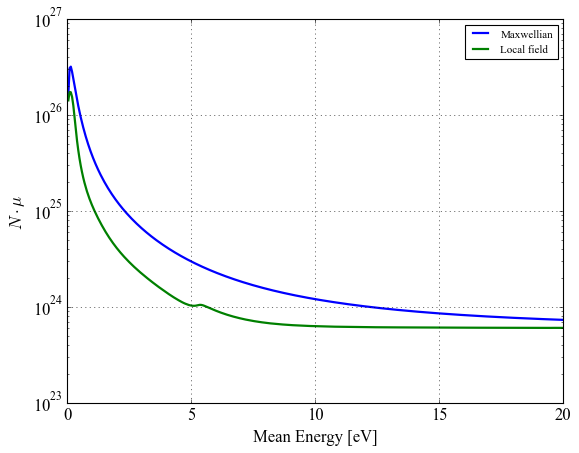

In [113]:
mu     = np.linspace(0.5, 20, 400)
D      = np.linspace(0.5, 20, 400)
mu_eps = np.linspace(0.5, 20, 400)
D_eps  = np.linspace(0.5, 20, 400)

for i, T in enumerate(sigma_en_eff.Temperature):
    vel             = sigma_en_eff.Velocity
    dF_dv           = -2/np.pi**(3./2.)*(m_e/(2*e*T))**(5./2)*vel*np.exp(-m_e*vel**2/(2*e*T))
    nu_m_ov_v       = sigma_en_eff.Sigma
    functional      = vel**2/nu_m_ov_v*dF_dv
    factor          = -4*np.pi/(3*m_e)*e
    mu[i]           = factor*integrate.trapz(functional, x= vel)
    
f, ax = plt.subplots()

ax.plot(3./2.*sigma_en_eff.Temperature, mu, label="Maxwellian")
ax.plot(3./2.*sigma_en_eff.Temperature, mu_LF, label="Local field")
ax.set_ylabel(r'$N\cdot\mu$')
ax.set_xlabel(r'Mean Energy [eV]')
ax.set_yscale('log')
# ax.set_xlim([1., 10])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11_elec.pdf", bbox_inches='tight')



plt.show()
# print("mu = ", mu)

In [114]:
D_LF = [0.6763E+25, 0.2079E+26, 0.3202E+26, 0.4030E+26, 0.4478E+26, 0.4509E+26, 0.4276E+26, 0.3966E+26, 0.3681E+26, 0.3420E+26, 0.3191E+26, 0.2993E+26, 0.2838E+26, 0.2683E+26, 0.2558E+26, 0.2446E+26, 0.2349E+26, 0.2250E+26, 0.2173E+26, 0.2111E+26, 0.2034E+26, 0.1964E+26, 0.1914E+26, 0.1874E+26, 0.1832E+26, 0.1775E+26, 0.1727E+26, 0.1686E+26, 0.1652E+26, 0.1618E+26, 0.1594E+26, 0.1564E+26, 0.1531E+26, 0.1504E+26, 0.1473E+26, 0.1446E+26, 0.1422E+26, 0.1400E+26, 0.1379E+26, 0.1359E+26, 0.1342E+26, 0.1326E+26, 0.1311E+26, 0.1292E+26, 0.1272E+26, 0.1254E+26, 0.1238E+26, 0.1223E+26, 0.1209E+26, 0.1196E+26, 0.1183E+26, 0.1172E+26, 0.1159E+26, 0.1147E+26, 0.1135E+26, 0.1123E+26, 0.1108E+26, 0.1097E+26, 0.1087E+26, 0.1078E+26, 0.1069E+26, 0.1059E+26, 0.1050E+26, 0.1040E+26, 0.1031E+26, 0.1022E+26, 0.1014E+26, 0.1005E+26, 0.9967E+25, 0.9885E+25, 0.9805E+25, 0.9727E+25, 0.9651E+25, 0.9576E+25, 0.9505E+25, 0.9430E+25, 0.9359E+25, 0.9290E+25, 0.9222E+25, 0.9155E+25, 0.9089E+25, 0.9025E+25, 0.8962E+25, 0.8900E+25, 0.8839E+25, 0.8779E+25, 0.8720E+25, 0.8663E+25, 0.8607E+25, 0.8552E+25, 0.8499E+25, 0.8446E+25, 0.8396E+25, 0.8346E+25, 0.8298E+25, 0.8253E+25, 0.8208E+25, 0.8166E+25, 0.8126E+25, 0.8089E+25, 0.8054E+25, 0.8023E+25, 0.7997E+25, 0.7974E+25, 0.7956E+25, 0.7941E+25, 0.7924E+25, 0.7901E+25, 0.7874E+25, 0.7842E+25, 0.7807E+25, 0.7772E+25, 0.7736E+25, 0.7700E+25, 0.7665E+25, 0.7630E+25, 0.7595E+25, 0.7562E+25, 0.7529E+25, 0.7496E+25, 0.7468E+25, 0.7438E+25, 0.7407E+25, 0.7378E+25, 0.7349E+25, 0.7321E+25, 0.7295E+25, 0.7268E+25, 0.7242E+25, 0.7217E+25, 0.7192E+25, 0.7168E+25, 0.7145E+25, 0.7122E+25, 0.7101E+25, 0.7079E+25, 0.7058E+25, 0.7038E+25, 0.7019E+25, 0.7000E+25, 0.6982E+25, 0.6964E+25, 0.6947E+25, 0.6930E+25, 0.6915E+25, 0.6900E+25, 0.6885E+25, 0.6871E+25, 0.6858E+25, 0.6844E+25, 0.6832E+25, 0.6819E+25, 0.6807E+25, 0.6796E+25, 0.6784E+25, 0.6770E+25, 0.6759E+25, 0.6748E+25, 0.6737E+25, 0.6726E+25, 0.6717E+25, 0.6707E+25, 0.6697E+25, 0.6689E+25, 0.6682E+25, 0.6673E+25, 0.6665E+25, 0.6659E+25, 0.6653E+25, 0.6648E+25, 0.6643E+25, 0.6637E+25, 0.6633E+25, 0.6629E+25, 0.6625E+25, 0.6621E+25, 0.6618E+25, 0.6604E+25, 0.6603E+25, 0.6601E+25, 0.6605E+25, 0.6604E+25, 0.6603E+25, 0.6598E+25, 0.6597E+25, 0.6596E+25, 0.6596E+25, 0.6596E+25, 0.6597E+25, 0.6599E+25, 0.6601E+25, 0.6603E+25, 0.6605E+25, 0.6607E+25, 0.6605E+25, 0.6609E+25, 0.6612E+25, 0.6616E+25, 0.6620E+25, 0.6624E+25, 0.6628E+25, 0.6632E+25, 0.6636E+25, 0.6640E+25, 0.6645E+25, 0.6651E+25, 0.6656E+25, 0.6662E+25, 0.6668E+25, 0.6674E+25, 0.6681E+25, 0.6687E+25, 0.6693E+25, 0.6700E+25, 0.6706E+25, 0.6712E+25, 0.6719E+25, 0.6724E+25, 0.6732E+25, 0.6739E+25, 0.6747E+25, 0.6755E+25, 0.6764E+25, 0.6771E+25, 0.6780E+25, 0.6787E+25, 0.6788E+25, 0.6797E+25, 0.6805E+25, 0.6814E+25, 0.6822E+25, 0.6831E+25, 0.6840E+25, 0.6850E+25, 0.6861E+25, 0.6871E+25, 0.6882E+25, 0.6892E+25, 0.6902E+25, 0.6913E+25, 0.6923E+25, 0.6934E+25, 0.6945E+25, 0.6955E+25, 0.6965E+25, 0.6975E+25, 0.6985E+25, 0.6995E+25, 0.7006E+25, 0.7016E+25, 0.7027E+25, 0.7039E+25, 0.7051E+25, 0.7064E+25, 0.7076E+25, 0.7085E+25, 0.7097E+25, 0.7108E+25, 0.7120E+25, 0.7133E+25, 0.7145E+25, 0.7158E+25, 0.7171E+25, 0.7179E+25, 0.7192E+25, 0.7206E+25, 0.7218E+25, 0.7231E+25, 0.7243E+25, 0.7256E+25, 0.7269E+25, 0.7281E+25, 0.7294E+25, 0.7307E+25, 0.7320E+25, 0.7334E+25, 0.7347E+25, 0.7360E+25, 0.7373E+25, 0.7387E+25, 0.7401E+25, 0.7415E+25, 0.7428E+25, 0.7442E+25, 0.7456E+25, 0.7469E+25, 0.7483E+25, 0.7496E+25, 0.7509E+25, 0.7521E+25, 0.7536E+25, 0.7551E+25, 0.7566E+25, 0.7581E+25, 0.7596E+25, 0.7611E+25, 0.7626E+25, 0.7641E+25, 0.7655E+25, 0.7669E+25, 0.7684E+25, 0.7698E+25, 0.7713E+25, 0.7728E+25, 0.7742E+25, 0.7757E+25, 0.7773E+25, 0.7788E+25, 0.7804E+25, 0.7820E+25, 0.7835E+25, 0.7851E+25, 0.7876E+25, 0.7892E+25, 0.7907E+25, 0.7923E+25, 0.7938E+25, 0.7953E+25, 0.7968E+25, 0.7983E+25, 0.7998E+25, 0.8014E+25, 0.8029E+25, 0.8044E+25, 0.8059E+25, 0.8074E+25, 0.8089E+25, 0.8104E+25, 0.8119E+25, 0.8134E+25, 0.8149E+25, 0.8182E+25, 0.8199E+25, 0.8215E+25, 0.8232E+25, 0.8249E+25, 0.8266E+25, 0.8283E+25, 0.8299E+25, 0.8316E+25, 0.8333E+25, 0.8350E+25, 0.8366E+25, 0.8389E+25, 0.8406E+25, 0.8423E+25, 0.8439E+25, 0.8456E+25, 0.8473E+25, 0.8489E+25, 0.8506E+25, 0.8523E+25, 0.8581E+25, 0.8599E+25, 0.8616E+25, 0.8633E+25, 0.8650E+25, 0.8667E+25, 0.8683E+25, 0.8700E+25, 0.8717E+25, 0.8733E+25, 0.8750E+25, 0.8767E+25, 0.8784E+25, 0.8801E+25, 0.8818E+25, 0.8860E+25, 0.8877E+25, 0.8894E+25, 0.8911E+25, 0.8927E+25, 0.8943E+25, 0.8959E+25, 0.8975E+25, 0.8992E+25, 0.9009E+25, 0.9026E+25, 0.9043E+25, 0.9128E+25, 0.9144E+25, 0.9161E+25, 0.9177E+25, 0.9194E+25, 0.9211E+25, 0.9227E+25, 0.9243E+25, 0.9260E+25, 0.9276E+25, 0.9293E+25, 0.9291E+25, 0.9307E+25, 0.9323E+25, 0.9339E+25, 0.9355E+25, 0.9370E+25, 0.9387E+25, 0.9403E+25, 0.9419E+25, 0.9436E+25]
    

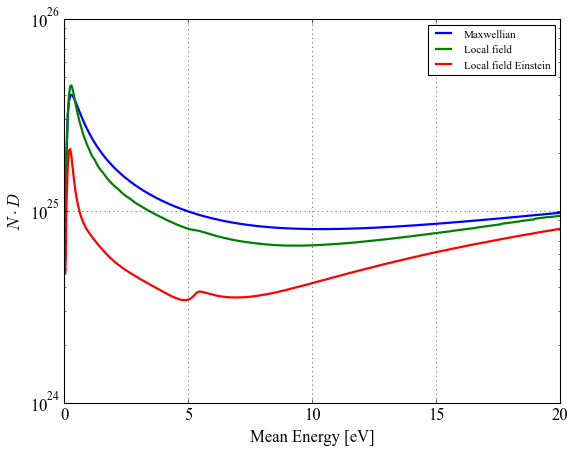

In [115]:
for i, T in enumerate(sigma_en_eff.Temperature):
    vel             = sigma_en_eff.Velocity
    F               = (m_e/(2*e*T*np.pi))**(3./2.)*np.exp(-m_e*vel**2/(2*e*T))
    #dF_dv           = -2/np.pi**(3./2.)*(m_e/(2*e*T))**(5./2)*vel*np.exp(-m_e*vel**2/(2*e*T))
    nu_m_ov_v       = sigma_en_eff.Sigma
    functional      = vel**3/nu_m_ov_v*F
    factor          = 4*np.pi/3.
    D[i]            = factor*integrate.trapz(functional, x= vel)
    
f, ax = plt.subplots()

ax.plot(3./2.*sigma_en_eff.Temperature, D, label="Maxwellian")
ax.plot(3./2.*sigma_en_eff.Temperature, D_LF, label="Local field")
ax.plot(3./2.*sigma_en_eff.Temperature, D_LF_Fake, label="Local field Einstein")

ax.set_ylabel(r'$N\cdot D$')
ax.set_xlabel(r'Mean Energy [eV]')
ax.set_yscale('log')
# ax.set_xlim([1., 20])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11_elec.pdf", bbox_inches='tight')



plt.show()
# print("D = ", D)


In [116]:
mu_eps_LF = [0.3794E+27, 0.3665E+27, 0.3037E+27, 0.2440E+27, 0.1883E+27, 0.1400E+27, 0.1044E+27, 0.8027E+26, 0.6397E+26, 0.5257E+26, 0.4431E+26, 0.3812E+26, 0.3335E+26, 0.2957E+26, 0.2654E+26, 0.2405E+26, 0.2197E+26, 0.2020E+26, 0.1868E+26, 0.1735E+26, 0.1618E+26, 0.1513E+26, 0.1418E+26, 0.1333E+26, 0.1255E+26, 0.1184E+26, 0.1119E+26, 0.1059E+26, 0.1004E+26, 0.9534E+25, 0.9070E+25, 0.8640E+25, 0.8243E+25, 0.7876E+25, 0.7536E+25, 0.7219E+25, 0.6925E+25, 0.6650E+25, 0.6394E+25, 0.6154E+25, 0.5929E+25, 0.5718E+25, 0.5520E+25, 0.5333E+25, 0.5156E+25, 0.4989E+25, 0.4832E+25, 0.4682E+25, 0.4540E+25, 0.4405E+25, 0.4276E+25, 0.4154E+25, 0.4037E+25, 0.3925E+25, 0.3819E+25, 0.3716E+25, 0.3618E+25, 0.3524E+25, 0.3434E+25, 0.3347E+25, 0.3264E+25, 0.3183E+25, 0.3106E+25, 0.3031E+25, 0.2959E+25, 0.2889E+25, 0.2822E+25, 0.2757E+25, 0.2694E+25, 0.2633E+25, 0.2574E+25, 0.2517E+25, 0.2461E+25, 0.2408E+25, 0.2356E+25, 0.2305E+25, 0.2257E+25, 0.2209E+25, 0.2164E+25, 0.2119E+25, 0.2076E+25, 0.2035E+25, 0.1995E+25, 0.1956E+25, 0.1918E+25, 0.1881E+25, 0.1846E+25, 0.1812E+25, 0.1779E+25, 0.1747E+25, 0.1716E+25, 0.1686E+25, 0.1657E+25, 0.1630E+25, 0.1603E+25, 0.1578E+25, 0.1553E+25, 0.1530E+25, 0.1508E+25, 0.1488E+25, 0.1468E+25, 0.1450E+25, 0.1434E+25, 0.1419E+25, 0.1407E+25, 0.1396E+25, 0.1386E+25, 0.1376E+25, 0.1364E+25, 0.1353E+25, 0.1340E+25, 0.1328E+25, 0.1316E+25, 0.1304E+25, 0.1292E+25, 0.1281E+25, 0.1270E+25, 0.1259E+25, 0.1249E+25, 0.1239E+25, 0.1229E+25, 0.1219E+25, 0.1210E+25, 0.1201E+25, 0.1193E+25, 0.1184E+25, 0.1176E+25, 0.1169E+25, 0.1161E+25, 0.1154E+25, 0.1147E+25, 0.1140E+25, 0.1134E+25, 0.1128E+25, 0.1122E+25, 0.1116E+25, 0.1111E+25, 0.1105E+25, 0.1101E+25, 0.1096E+25, 0.1091E+25, 0.1087E+25, 0.1083E+25, 0.1078E+25, 0.1075E+25, 0.1071E+25, 0.1067E+25, 0.1064E+25, 0.1061E+25, 0.1058E+25, 0.1055E+25, 0.1052E+25, 0.1049E+25, 0.1047E+25, 0.1044E+25, 0.1042E+25, 0.1040E+25, 0.1038E+25, 0.1036E+25, 0.1034E+25, 0.1032E+25, 0.1030E+25, 0.1029E+25, 0.1027E+25, 0.1026E+25, 0.1024E+25, 0.1023E+25, 0.1022E+25, 0.1021E+25, 0.1020E+25, 0.1019E+25, 0.1018E+25, 0.1017E+25, 0.1016E+25, 0.1015E+25, 0.1014E+25, 0.1013E+25, 0.1013E+25, 0.1012E+25, 0.1012E+25, 0.1011E+25, 0.1010E+25, 0.1010E+25, 0.1010E+25, 0.1009E+25, 0.1009E+25, 0.1008E+25, 0.1008E+25, 0.1008E+25, 0.1008E+25, 0.1007E+25, 0.1007E+25, 0.1007E+25, 0.1006E+25, 0.1006E+25, 0.1006E+25, 0.1006E+25, 0.1006E+25, 0.1006E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1005E+25, 0.1005E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1006E+25, 0.1006E+25, 0.1006E+25, 0.1006E+25, 0.1006E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1005E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1003E+25, 0.1003E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1004E+25, 0.1003E+25, 0.1003E+25, 0.1003E+25, 0.1003E+25, 0.1003E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1003E+25, 0.1003E+25, 0.1003E+25, 0.1003E+25, 0.1003E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1002E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1002E+25, 0.1002E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25, 0.1001E+25]
    

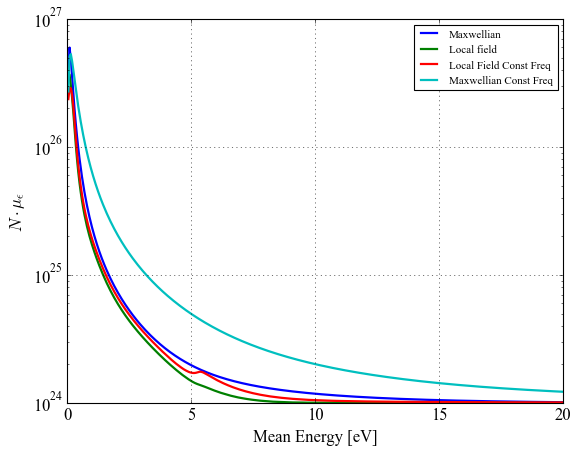

In [126]:
for i, T in enumerate(sigma_en_eff.Temperature):
    vel             = sigma_en_eff.Velocity
    #F               = (m_e/(2*e*T*np.pi))**(3./2.)*np.exp(-m_e*vel**2/(2*e*T))
    dF_dv           = -2/np.pi**(3./2.)*(m_e/(2*e*T))**(5./2)*vel*np.exp(-m_e*vel**2/(2*e*T))
    nu_m_ov_v       = sigma_en_eff.Sigma
    functional      = vel**4/nu_m_ov_v*dF_dv
    factor          = -2*np.pi/3.*1/(3./2.*T)
    mu_eps[i]       = factor*integrate.trapz(functional, x= vel)
    
f, ax = plt.subplots()

ax.plot(3./2.*sigma_en_eff.Temperature, mu_eps, label = "Maxwellian")
ax.plot(3./2.*sigma_en_eff.Temperature, mu_eps_LF, label = "Local field")
ax.plot(3./2.*sigma_en_eff.Temperature, mu_eps_LF_Fake, label = "Local Field Const Freq")
ax.plot(3./2.*sigma_en_eff.Temperature, 5./3.*mu, label="Maxwellian Const Freq")


ax.set_ylabel(r'$N\cdot \mu_\epsilon$')
ax.set_xlabel(r'Mean Energy [eV]')
ax.set_yscale('log')
# ax.set_xlim([1., 20])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11_elec.pdf", bbox_inches='tight')



plt.show()
# print("mu_eps = ", mu_eps)


In [43]:
D_eps_LF = [ 0.2253E+26, 0.4780E+26, 0.5340E+26, 0.5351E+26, 0.5050E+26, 0.4544E+26, 0.3989E+26, 0.3502E+26, 0.3116E+26, 0.2802E+26, 0.2550E+26, 0.2346E+26, 0.2184E+26, 0.2042E+26, 0.1927E+26, 0.1828E+26, 0.1745E+26, 0.1669E+26, 0.1605E+26, 0.1552E+26, 0.1499E+26, 0.1452E+26, 0.1413E+26, 0.1378E+26, 0.1345E+26, 0.1311E+26, 0.1281E+26, 0.1253E+26, 0.1228E+26, 0.1204E+26, 0.1183E+26, 0.1161E+26, 0.1140E+26, 0.1121E+26, 0.1102E+26, 0.1084E+26, 0.1067E+26, 0.1051E+26, 0.1036E+26, 0.1022E+26, 0.1008E+26, 0.9954E+25, 0.9830E+25, 0.9705E+25, 0.9584E+25, 0.9464E+25, 0.9355E+25, 0.9248E+25, 0.9148E+25, 0.9050E+25, 0.8957E+25, 0.8866E+25, 0.8776E+25, 0.8690E+25, 0.8606E+25, 0.8524E+25, 0.8441E+25, 0.8365E+25, 0.8290E+25, 0.8218E+25, 0.8148E+25, 0.8078E+25, 0.8010E+25, 0.7944E+25, 0.7879E+25, 0.7815E+25, 0.7753E+25, 0.7692E+25, 0.7632E+25, 0.7573E+25, 0.7516E+25, 0.7459E+25, 0.7404E+25, 0.7349E+25, 0.7296E+25, 0.7242E+25, 0.7190E+25, 0.7139E+25, 0.7088E+25, 0.7039E+25, 0.6990E+25, 0.6941E+25, 0.6894E+25, 0.6847E+25, 0.6801E+25, 0.6755E+25, 0.6711E+25, 0.6666E+25, 0.6623E+25, 0.6580E+25, 0.6538E+25, 0.6496E+25, 0.6455E+25, 0.6415E+25, 0.6375E+25, 0.6335E+25, 0.6296E+25, 0.6258E+25, 0.6220E+25, 0.6182E+25, 0.6145E+25, 0.6108E+25, 0.6071E+25, 0.6035E+25, 0.5999E+25, 0.5965E+25, 0.5934E+25, 0.5904E+25, 0.5877E+25, 0.5852E+25, 0.5828E+25, 0.5805E+25, 0.5784E+25, 0.5763E+25, 0.5743E+25, 0.5725E+25, 0.5707E+25, 0.5689E+25, 0.5673E+25, 0.5657E+25, 0.5642E+25, 0.5628E+25, 0.5614E+25, 0.5601E+25, 0.5588E+25, 0.5577E+25, 0.5566E+25, 0.5555E+25, 0.5545E+25, 0.5536E+25, 0.5527E+25, 0.5519E+25, 0.5512E+25, 0.5505E+25, 0.5499E+25, 0.5493E+25, 0.5488E+25, 0.5483E+25, 0.5480E+25, 0.5476E+25, 0.5473E+25, 0.5472E+25, 0.5470E+25, 0.5469E+25, 0.5470E+25, 0.5470E+25, 0.5471E+25, 0.5473E+25, 0.5475E+25, 0.5477E+25, 0.5481E+25, 0.5485E+25, 0.5489E+25, 0.5494E+25, 0.5500E+25, 0.5506E+25, 0.5513E+25, 0.5520E+25, 0.5527E+25, 0.5536E+25, 0.5546E+25, 0.5554E+25, 0.5563E+25, 0.5573E+25, 0.5585E+25, 0.5596E+25, 0.5607E+25, 0.5620E+25, 0.5633E+25, 0.5646E+25, 0.5660E+25, 0.5674E+25, 0.5689E+25, 0.5705E+25, 0.5720E+25, 0.5735E+25, 0.5751E+25, 0.5769E+25, 0.5787E+25, 0.5804E+25, 0.5820E+25, 0.5839E+25, 0.5858E+25, 0.5880E+25, 0.5899E+25, 0.5918E+25, 0.5937E+25, 0.5957E+25, 0.5978E+25, 0.6001E+25, 0.6022E+25, 0.6044E+25, 0.6066E+25, 0.6088E+25, 0.6110E+25, 0.6133E+25, 0.6157E+25, 0.6181E+25, 0.6205E+25, 0.6229E+25, 0.6254E+25, 0.6278E+25, 0.6302E+25, 0.6327E+25, 0.6352E+25, 0.6378E+25, 0.6405E+25, 0.6431E+25, 0.6457E+25, 0.6484E+25, 0.6511E+25, 0.6538E+25, 0.6565E+25, 0.6592E+25, 0.6619E+25, 0.6647E+25, 0.6675E+25, 0.6703E+25, 0.6732E+25, 0.6761E+25, 0.6790E+25, 0.6820E+25, 0.6850E+25, 0.6878E+25, 0.6907E+25, 0.6935E+25, 0.6969E+25, 0.6999E+25, 0.7030E+25, 0.7060E+25, 0.7090E+25, 0.7120E+25, 0.7150E+25, 0.7182E+25, 0.7213E+25, 0.7245E+25, 0.7277E+25, 0.7308E+25, 0.7340E+25, 0.7372E+25, 0.7405E+25, 0.7438E+25, 0.7470E+25, 0.7501E+25, 0.7533E+25, 0.7566E+25, 0.7598E+25, 0.7631E+25, 0.7663E+25, 0.7695E+25, 0.7728E+25, 0.7761E+25, 0.7795E+25, 0.7830E+25, 0.7864E+25, 0.7898E+25, 0.7932E+25, 0.7966E+25, 0.8000E+25, 0.8034E+25, 0.8069E+25, 0.8104E+25, 0.8140E+25, 0.8178E+25, 0.8214E+25, 0.8249E+25, 0.8284E+25, 0.8318E+25, 0.8352E+25, 0.8387E+25, 0.8422E+25, 0.8456E+25, 0.8492E+25, 0.8527E+25, 0.8563E+25, 0.8598E+25, 0.8634E+25, 0.8670E+25, 0.8706E+25, 0.8742E+25, 0.8779E+25, 0.8816E+25, 0.8852E+25, 0.8889E+25, 0.8925E+25, 0.8962E+25, 0.8998E+25, 0.9034E+25, 0.9070E+25, 0.9112E+25, 0.9149E+25, 0.9186E+25, 0.9223E+25, 0.9261E+25, 0.9298E+25, 0.9335E+25, 0.9373E+25, 0.9411E+25, 0.9447E+25, 0.9484E+25, 0.9521E+25, 0.9559E+25, 0.9596E+25, 0.9634E+25, 0.9671E+25, 0.9709E+25, 0.9747E+25, 0.9785E+25, 0.9823E+25, 0.9862E+25, 0.9900E+25, 0.9938E+25, 0.9985E+25, 0.1002E+26, 0.1006E+26, 0.1010E+26, 0.1014E+26, 0.1018E+26, 0.1022E+26, 0.1026E+26, 0.1029E+26, 0.1033E+26, 0.1037E+26, 0.1041E+26, 0.1045E+26, 0.1049E+26, 0.1053E+26, 0.1056E+26, 0.1060E+26, 0.1064E+26, 0.1068E+26, 0.1073E+26, 0.1077E+26, 0.1081E+26, 0.1085E+26, 0.1089E+26, 0.1093E+26, 0.1097E+26, 0.1101E+26, 0.1105E+26, 0.1109E+26, 0.1113E+26, 0.1117E+26, 0.1121E+26, 0.1125E+26, 0.1129E+26, 0.1133E+26, 0.1137E+26, 0.1141E+26, 0.1145E+26, 0.1149E+26, 0.1153E+26, 0.1159E+26, 0.1163E+26, 0.1167E+26, 0.1171E+26, 0.1175E+26, 0.1179E+26, 0.1183E+26, 0.1187E+26, 0.1191E+26, 0.1195E+26, 0.1199E+26, 0.1203E+26, 0.1208E+26, 0.1212E+26, 0.1216E+26, 0.1222E+26, 0.1226E+26, 0.1230E+26, 0.1234E+26, 0.1238E+26, 0.1242E+26, 0.1246E+26, 0.1251E+26, 0.1255E+26, 0.1259E+26, 0.1263E+26, 0.1267E+26, 0.1273E+26, 0.1278E+26, 0.1282E+26, 0.1286E+26, 0.1290E+26, 0.1294E+26, 0.1299E+26, 0.1303E+26, 0.1307E+26, 0.1311E+26, 0.1315E+26, 0.1322E+26, 0.1326E+26, 0.1330E+26, 0.1334E+26, 0.1339E+26, 0.1343E+26, 0.1347E+26, 0.1351E+26, 0.1356E+26, 0.1360E+26]


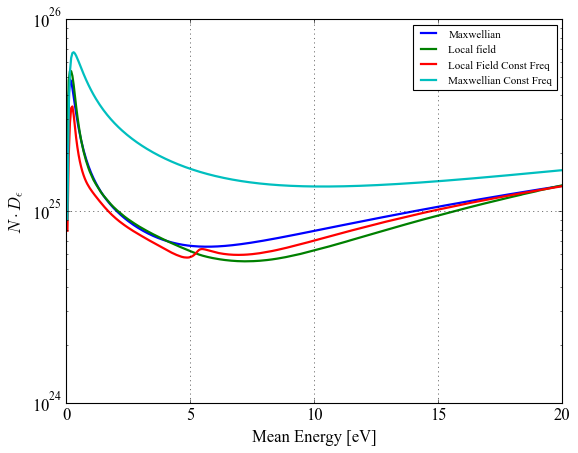

In [127]:
for i, T in enumerate(sigma_en_eff.Temperature):
    vel             = sigma_en_eff.Velocity
    F               = (m_e/(2*e*T*np.pi))**(3./2.)*np.exp(-m_e*vel**2/(2*e*T))
    #dF_dv           = -2/np.pi**(3./2.)*(m_e/(2*e*T))**(5./2)*vel*np.exp(-m_e*vel**2/(2*e*T))
    nu_m_ov_v       = sigma_en_eff.Sigma
    functional      = vel**5/nu_m_ov_v*F
    factor          = 2*np.pi*m_e/(3.*e)*1/(3./2.*T)
    D_eps[i]        = factor*integrate.trapz(functional, x= vel)
    
f, ax = plt.subplots()

ax.plot(3./2.*sigma_en_eff.Temperature, D_eps, label = "Maxwellian")
ax.plot(3./2.*sigma_en_eff.Temperature, D_eps_LF, label = "Local field")
ax.plot(3./2.*sigma_en_eff.Temperature, D_eps_LF_Fake, label = "Local Field Const Freq")
ax.plot(3./2.*sigma_en_eff.Temperature, 5./3.*D, label = "Maxwellian Const Freq")

ax.set_ylabel(r'$N\cdot D_{\epsilon}$')
ax.set_xlabel(r'Mean Energy [eV]')
ax.set_yscale('log')
# ax.set_xlim([1., 20])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11_elec.pdf", bbox_inches='tight')



plt.show()
# print("D_eps = ", D_eps)

In [51]:
P_loss_LF =  [0.2116E-21, 0.1052E-20, 0.2048E-20, 0.3384E-20, 0.5420E-20, 0.8822E-20, 0.1420E-19, 0.2180E-19, 0.3171E-19, 0.4402E-19, 0.5879E-19, 0.7607E-19, 0.9588E-19, 0.1182E-18, 0.1432E-18, 0.1707E-18, 0.2007E-18, 0.2333E-18, 0.2685E-18, 0.3064E-18, 0.3470E-18, 0.3904E-18, 0.4367E-18, 0.4861E-18, 0.5387E-18, 0.5946E-18, 0.6540E-18, 0.7168E-18, 0.7833E-18, 0.8535E-18, 0.9276E-18, 0.1005E-17, 0.1087E-17, 0.1173E-17, 0.1263E-17, 0.1357E-17, 0.1455E-17, 0.1557E-17, 0.1664E-17, 0.1775E-17, 0.1889E-17, 0.2009E-17, 0.2132E-17, 0.2260E-17, 0.2393E-17, 0.2530E-17, 0.2671E-17, 0.2817E-17, 0.2967E-17, 0.3123E-17, 0.3282E-17, 0.3447E-17, 0.3617E-17, 0.3791E-17, 0.3970E-17, 0.4155E-17, 0.4344E-17, 0.4539E-17, 0.4739E-17, 0.4944E-17, 0.5154E-17, 0.5370E-17, 0.5592E-17, 0.5819E-17, 0.6052E-17, 0.6291E-17, 0.6536E-17, 0.6787E-17, 0.7044E-17, 0.7307E-17, 0.7577E-17, 0.7853E-17, 0.8136E-17, 0.8426E-17, 0.8722E-17, 0.9026E-17, 0.9337E-17, 0.9655E-17, 0.9982E-17, 0.1032E-16, 0.1066E-16, 0.1101E-16, 0.1138E-16, 0.1176E-16, 0.1215E-16, 0.1256E-16, 0.1299E-16, 0.1344E-16, 0.1392E-16, 0.1444E-16, 0.1499E-16, 0.1560E-16, 0.1626E-16, 0.1701E-16, 0.1784E-16, 0.1880E-16, 0.1992E-16, 0.2123E-16, 0.2282E-16, 0.2478E-16, 0.2729E-16, 0.3059E-16, 0.3515E-16, 0.4175E-16, 0.5183E-16, 0.6760E-16, 0.9123E-16, 0.1236E-15, 0.1645E-15, 0.2133E-15, 0.2697E-15, 0.3340E-15, 0.4063E-15, 0.4867E-15, 0.5758E-15, 0.6738E-15, 0.7814E-15, 0.8989E-15, 0.1027E-14, 0.1166E-14, 0.1317E-14, 0.1480E-14, 0.1656E-14, 0.1845E-14, 0.2048E-14, 0.2268E-14, 0.2502E-14, 0.2753E-14, 0.3021E-14, 0.3306E-14, 0.3612E-14, 0.3936E-14, 0.4280E-14, 0.4646E-14, 0.5034E-14, 0.5444E-14, 0.5877E-14, 0.6336E-14, 0.6819E-14, 0.7327E-14, 0.7862E-14, 0.8422E-14, 0.9011E-14, 0.9628E-14, 0.1027E-13, 0.1095E-13, 0.1165E-13, 0.1239E-13, 0.1315E-13, 0.1395E-13, 0.1477E-13, 0.1563E-13, 0.1653E-13, 0.1745E-13, 0.1840E-13, 0.1939E-13, 0.2041E-13, 0.2146E-13, 0.2255E-13, 0.2367E-13, 0.2482E-13, 0.2600E-13, 0.2722E-13, 0.2848E-13, 0.2976E-13, 0.3107E-13, 0.3243E-13, 0.3380E-13, 0.3521E-13, 0.3665E-13, 0.3813E-13, 0.3964E-13, 0.4118E-13, 0.4275E-13, 0.4435E-13, 0.4598E-13, 0.4764E-13, 0.4935E-13, 0.5106E-13, 0.5281E-13, 0.5457E-13, 0.5637E-13, 0.5820E-13, 0.6008E-13, 0.6197E-13, 0.6388E-13, 0.6581E-13, 0.6779E-13, 0.6978E-13, 0.7178E-13, 0.7380E-13, 0.7585E-13, 0.7793E-13, 0.8004E-13, 0.8220E-13, 0.8434E-13, 0.8650E-13, 0.8869E-13, 0.9089E-13, 0.9312E-13, 0.9537E-13, 0.9765E-13, 0.9995E-13, 0.1023E-12, 0.1046E-12, 0.1069E-12, 0.1093E-12, 0.1116E-12, 0.1140E-12, 0.1164E-12, 0.1189E-12, 0.1213E-12, 0.1237E-12, 0.1262E-12, 0.1287E-12, 0.1312E-12, 0.1337E-12, 0.1362E-12, 0.1387E-12, 0.1413E-12, 0.1438E-12, 0.1464E-12, 0.1490E-12, 0.1516E-12, 0.1542E-12, 0.1568E-12, 0.1594E-12, 0.1621E-12, 0.1647E-12, 0.1674E-12, 0.1701E-12, 0.1727E-12, 0.1754E-12, 0.1780E-12, 0.1807E-12, 0.1834E-12, 0.1861E-12, 0.1888E-12, 0.1915E-12, 0.1942E-12, 0.1969E-12, 0.1996E-12, 0.2024E-12, 0.2051E-12, 0.2078E-12, 0.2106E-12, 0.2133E-12, 0.2161E-12, 0.2189E-12, 0.2216E-12, 0.2244E-12, 0.2271E-12, 0.2299E-12, 0.2327E-12, 0.2355E-12, 0.2382E-12, 0.2410E-12, 0.2438E-12, 0.2466E-12, 0.2494E-12, 0.2522E-12, 0.2550E-12, 0.2578E-12, 0.2607E-12, 0.2634E-12, 0.2662E-12, 0.2690E-12, 0.2718E-12, 0.2746E-12, 0.2774E-12, 0.2802E-12, 0.2830E-12, 0.2858E-12, 0.2886E-12, 0.2914E-12, 0.2941E-12, 0.2969E-12, 0.2997E-12, 0.3025E-12, 0.3053E-12, 0.3081E-12, 0.3109E-12, 0.3137E-12, 0.3165E-12, 0.3193E-12, 0.3221E-12, 0.3249E-12, 0.3277E-12, 0.3304E-12, 0.3334E-12, 0.3362E-12, 0.3389E-12, 0.3417E-12, 0.3445E-12, 0.3472E-12, 0.3500E-12, 0.3528E-12, 0.3555E-12, 0.3583E-12, 0.3611E-12, 0.3638E-12, 0.3665E-12, 0.3693E-12, 0.3720E-12, 0.3748E-12, 0.3775E-12, 0.3802E-12, 0.3830E-12, 0.3857E-12, 0.3884E-12, 0.3911E-12, 0.3939E-12, 0.3968E-12, 0.3995E-12, 0.4023E-12, 0.4050E-12, 0.4077E-12, 0.4104E-12, 0.4131E-12, 0.4158E-12, 0.4185E-12, 0.4212E-12, 0.4239E-12, 0.4265E-12, 0.4292E-12, 0.4319E-12, 0.4345E-12, 0.4372E-12, 0.4399E-12, 0.4425E-12, 0.4452E-12, 0.4481E-12, 0.4507E-12, 0.4534E-12, 0.4560E-12, 0.4587E-12, 0.4613E-12, 0.4640E-12, 0.4666E-12, 0.4693E-12, 0.4719E-12, 0.4745E-12, 0.4771E-12, 0.4798E-12, 0.4824E-12, 0.4850E-12, 0.4875E-12, 0.4901E-12, 0.4927E-12, 0.4953E-12, 0.4979E-12, 0.5005E-12, 0.5034E-12, 0.5059E-12, 0.5085E-12, 0.5111E-12, 0.5136E-12, 0.5162E-12, 0.5187E-12, 0.5212E-12, 0.5238E-12, 0.5263E-12, 0.5289E-12, 0.5314E-12, 0.5339E-12, 0.5364E-12, 0.5390E-12, 0.5418E-12, 0.5444E-12, 0.5469E-12, 0.5494E-12, 0.5519E-12, 0.5544E-12, 0.5568E-12, 0.5593E-12, 0.5618E-12, 0.5642E-12, 0.5667E-12, 0.5692E-12, 0.5720E-12, 0.5744E-12, 0.5769E-12, 0.5793E-12, 0.5817E-12, 0.5842E-12, 0.5866E-12, 0.5890E-12, 0.5915E-12, 0.5939E-12, 0.5963E-12, 0.5992E-12, 0.6016E-12, 0.6040E-12, 0.6064E-12, 0.6088E-12, 0.6112E-12, 0.6136E-12, 0.6159E-12, 0.6183E-12, 0.6207E-12]


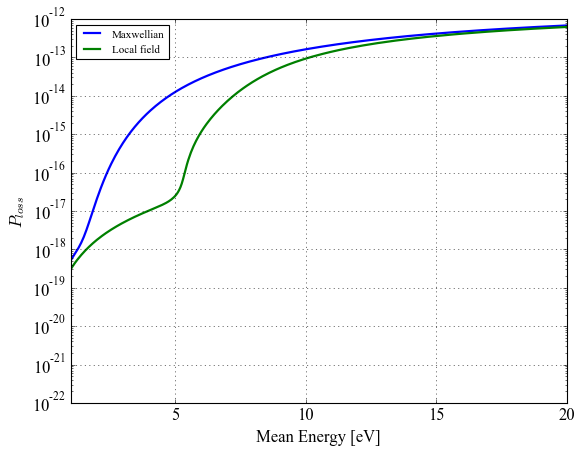

In [59]:
f, ax = plt.subplots()

ax.plot(3./2.*sigma_en_eff.Temperature, Source_energy, label = "Maxwellian")
ax.plot(3./2.*sigma_en_eff.Temperature, P_loss_LF, label = "Local field")
# ax.plot(3./2.*sigma_en_eff.Temperature, 5./3.*D, label = "Maxwellian Const Freq.")
ax.set_ylabel(r'$P_{loss}$')
ax.set_xlabel(r'Mean Energy [eV]')
ax.set_yscale('log')
ax.set_xlim([1., 20])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11_elec.pdf", bbox_inches='tight')



plt.show()
# print("D_eps = ", D_eps)

In [60]:
Kiz_LF = [ 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.1604E-27, 0.2381E-26, 0.1611E-25, 0.1141E-24, 0.1025E-23, 0.1129E-22, 0.1227E-21, 0.1034E-20, 0.6153E-20, 0.2638E-19, 0.8692E-19, 0.2361E-18, 0.5504E-18, 0.1140E-17, 0.2154E-17, 0.3778E-17, 0.6237E-17, 0.9795E-17, 0.1475E-16, 0.2143E-16, 0.3028E-16, 0.4155E-16, 0.5577E-16, 0.7338E-16, 0.9477E-16, 0.1206E-15, 0.1513E-15, 0.1874E-15, 0.2295E-15, 0.2780E-15, 0.3339E-15, 0.3972E-15, 0.4689E-15, 0.5495E-15, 0.6395E-15, 0.7398E-15, 0.8503E-15, 0.9726E-15, 0.1106E-14, 0.1253E-14, 0.1412E-14, 0.1584E-14, 0.1771E-14, 0.1972E-14, 0.2188E-14, 0.2419E-14, 0.2668E-14, 0.2931E-14, 0.3212E-14, 0.3510E-14, 0.3824E-14, 0.4157E-14, 0.4510E-14, 0.4879E-14, 0.5267E-14, 0.5675E-14, 0.6101E-14, 0.6548E-14, 0.7015E-14, 0.7500E-14, 0.8006E-14, 0.8534E-14, 0.9082E-14, 0.9651E-14, 0.1024E-13, 0.1085E-13, 0.1148E-13, 0.1213E-13, 0.1280E-13, 0.1349E-13, 0.1420E-13, 0.1493E-13, 0.1569E-13, 0.1646E-13, 0.1726E-13, 0.1808E-13, 0.1891E-13, 0.1978E-13, 0.2065E-13, 0.2155E-13, 0.2246E-13, 0.2340E-13, 0.2435E-13, 0.2534E-13, 0.2633E-13, 0.2735E-13, 0.2838E-13, 0.2944E-13, 0.3052E-13, 0.3160E-13, 0.3270E-13, 0.3382E-13, 0.3496E-13, 0.3612E-13, 0.3732E-13, 0.3851E-13, 0.3972E-13, 0.4094E-13, 0.4219E-13, 0.4345E-13, 0.4472E-13, 0.4602E-13, 0.4734E-13, 0.4867E-13, 0.5000E-13, 0.5135E-13, 0.5272E-13, 0.5409E-13, 0.5549E-13, 0.5690E-13, 0.5832E-13, 0.5975E-13, 0.6120E-13, 0.6267E-13, 0.6415E-13, 0.6564E-13, 0.6714E-13, 0.6865E-13, 0.7017E-13, 0.7171E-13, 0.7326E-13, 0.7483E-13, 0.7640E-13, 0.7798E-13, 0.7955E-13, 0.8115E-13, 0.8279E-13, 0.8442E-13, 0.8606E-13, 0.8771E-13, 0.8937E-13, 0.9103E-13, 0.9269E-13, 0.9435E-13, 0.9602E-13, 0.9770E-13, 0.9939E-13, 0.1011E-12, 0.1028E-12, 0.1045E-12, 0.1062E-12, 0.1080E-12, 0.1097E-12, 0.1115E-12, 0.1132E-12, 0.1150E-12, 0.1168E-12, 0.1186E-12, 0.1204E-12, 0.1221E-12, 0.1239E-12, 0.1257E-12, 0.1275E-12, 0.1293E-12, 0.1311E-12, 0.1329E-12, 0.1348E-12, 0.1366E-12, 0.1384E-12, 0.1403E-12, 0.1421E-12, 0.1440E-12, 0.1458E-12, 0.1478E-12, 0.1496E-12, 0.1515E-12, 0.1533E-12, 0.1552E-12, 0.1570E-12, 0.1589E-12, 0.1608E-12, 0.1627E-12, 0.1645E-12, 0.1664E-12, 0.1683E-12, 0.1702E-12, 0.1721E-12, 0.1740E-12, 0.1759E-12, 0.1778E-12, 0.1797E-12, 0.1816E-12, 0.1835E-12, 0.1854E-12, 0.1874E-12, 0.1893E-12, 0.1912E-12, 0.1931E-12, 0.1950E-12, 0.1970E-12, 0.1990E-12, 0.2009E-12, 0.2028E-12, 0.2047E-12, 0.2066E-12, 0.2086E-12, 0.2105E-12, 0.2124E-12, 0.2143E-12, 0.2163E-12, 0.2182E-12, 0.2201E-12, 0.2220E-12, 0.2239E-12, 0.2259E-12, 0.2278E-12, 0.2297E-12, 0.2316E-12, 0.2336E-12, 0.2355E-12, 0.2374E-12, 0.2394E-12, 0.2414E-12, 0.2433E-12, 0.2453E-12, 0.2472E-12, 0.2491E-12, 0.2511E-12, 0.2530E-12, 0.2549E-12, 0.2569E-12, 0.2588E-12, 0.2607E-12, 0.2626E-12, 0.2646E-12, 0.2665E-12, 0.2684E-12, 0.2703E-12, 0.2722E-12, 0.2742E-12, 0.2761E-12, 0.2781E-12, 0.2801E-12, 0.2820E-12, 0.2839E-12, 0.2858E-12, 0.2878E-12, 0.2897E-12, 0.2916E-12, 0.2935E-12, 0.2954E-12, 0.2974E-12, 0.2993E-12, 0.3012E-12, 0.3031E-12, 0.3050E-12, 0.3069E-12, 0.3088E-12, 0.3107E-12, 0.3126E-12, 0.3145E-12, 0.3164E-12, 0.3185E-12, 0.3204E-12, 0.3223E-12, 0.3242E-12, 0.3261E-12, 0.3280E-12, 0.3299E-12, 0.3317E-12, 0.3336E-12, 0.3355E-12, 0.3374E-12, 0.3393E-12, 0.3411E-12, 0.3430E-12, 0.3449E-12, 0.3471E-12, 0.3489E-12, 0.3508E-12, 0.3527E-12, 0.3545E-12, 0.3564E-12, 0.3582E-12, 0.3601E-12, 0.3620E-12, 0.3638E-12, 0.3657E-12, 0.3675E-12, 0.3695E-12, 0.3714E-12, 0.3732E-12, 0.3751E-12, 0.3769E-12, 0.3787E-12, 0.3806E-12, 0.3824E-12, 0.3842E-12, 0.3861E-12, 0.3879E-12, 0.3901E-12, 0.3919E-12, 0.3937E-12, 0.3956E-12, 0.3973E-12, 0.3992E-12, 0.4010E-12, 0.4028E-12, 0.4046E-12, 0.4064E-12]


In [62]:
Kiz_LF = [ 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.1015E-28, 0.1507E-27, 0.1020E-26, 0.7219E-26, 0.6490E-25, 0.7143E-24, 0.7764E-23, 0.6542E-22, 0.3894E-21, 0.1670E-20, 0.5501E-20, 0.1494E-19, 0.3483E-19, 0.7218E-19, 0.1364E-18, 0.2391E-18, 0.3948E-18, 0.6199E-18, 0.9333E-18, 0.1356E-17, 0.1916E-17, 0.2630E-17, 0.3530E-17, 0.4644E-17, 0.5998E-17, 0.7635E-17, 0.9577E-17, 0.1186E-16, 0.1453E-16, 0.1760E-16, 0.2113E-16, 0.2514E-16, 0.2968E-16, 0.3478E-16, 0.4048E-16, 0.4682E-16, 0.5382E-16, 0.6155E-16, 0.7003E-16, 0.7928E-16, 0.8937E-16, 0.1003E-15, 0.1121E-15, 0.1248E-15, 0.1385E-15, 0.1531E-15, 0.1689E-15, 0.1855E-15, 0.2033E-15, 0.2221E-15, 0.2420E-15, 0.2631E-15, 0.2854E-15, 0.3088E-15, 0.3334E-15, 0.3592E-15, 0.3862E-15, 0.4144E-15, 0.4440E-15, 0.4747E-15, 0.5067E-15, 0.5401E-15, 0.5748E-15, 0.6108E-15, 0.6479E-15, 0.6865E-15, 0.7266E-15, 0.7675E-15, 0.8098E-15, 0.8536E-15, 0.8987E-15, 0.9452E-15, 0.9929E-15, 0.1042E-14, 0.1092E-14, 0.1144E-14, 0.1197E-14, 0.1252E-14, 0.1307E-14, 0.1364E-14, 0.1422E-14, 0.1481E-14, 0.1541E-14, 0.1604E-14, 0.1667E-14, 0.1731E-14, 0.1796E-14, 0.1863E-14, 0.1932E-14, 0.2000E-14, 0.2069E-14, 0.2140E-14, 0.2213E-14, 0.2286E-14, 0.2362E-14, 0.2437E-14, 0.2514E-14, 0.2591E-14, 0.2670E-14, 0.2750E-14, 0.2831E-14, 0.2913E-14, 0.2996E-14, 0.3080E-14, 0.3165E-14, 0.3250E-14, 0.3336E-14, 0.3424E-14, 0.3512E-14, 0.3601E-14, 0.3691E-14, 0.3782E-14, 0.3874E-14, 0.3966E-14, 0.4060E-14, 0.4155E-14, 0.4249E-14, 0.4345E-14, 0.4441E-14, 0.4538E-14, 0.4637E-14, 0.4736E-14, 0.4836E-14, 0.4935E-14, 0.5035E-14, 0.5136E-14, 0.5240E-14, 0.5343E-14, 0.5447E-14, 0.5551E-14, 0.5656E-14, 0.5761E-14, 0.5866E-14, 0.5971E-14, 0.6077E-14, 0.6184E-14, 0.6291E-14, 0.6398E-14, 0.6506E-14, 0.6615E-14, 0.6725E-14, 0.6835E-14, 0.6945E-14, 0.7056E-14, 0.7167E-14, 0.7279E-14, 0.7392E-14, 0.7504E-14, 0.7617E-14, 0.7731E-14, 0.7845E-14, 0.7958E-14, 0.8071E-14, 0.8186E-14, 0.8300E-14, 0.8414E-14, 0.8530E-14, 0.8646E-14, 0.8762E-14, 0.8879E-14, 0.8996E-14, 0.9113E-14, 0.9231E-14, 0.9352E-14, 0.9469E-14, 0.9587E-14, 0.9705E-14, 0.9822E-14, 0.9940E-14, 0.1006E-13, 0.1018E-13, 0.1030E-13, 0.1041E-13, 0.1053E-13, 0.1065E-13, 0.1077E-13, 0.1089E-13, 0.1101E-13, 0.1113E-13, 0.1125E-13, 0.1137E-13, 0.1150E-13, 0.1162E-13, 0.1174E-13, 0.1186E-13, 0.1198E-13, 0.1210E-13, 0.1222E-13, 0.1234E-13, 0.1247E-13, 0.1259E-13, 0.1271E-13, 0.1284E-13, 0.1296E-13, 0.1308E-13, 0.1320E-13, 0.1332E-13, 0.1344E-13, 0.1356E-13, 0.1369E-13, 0.1381E-13, 0.1393E-13, 0.1405E-13, 0.1417E-13, 0.1430E-13, 0.1442E-13, 0.1454E-13, 0.1466E-13, 0.1478E-13, 0.1490E-13, 0.1503E-13, 0.1515E-13, 0.1528E-13, 0.1540E-13, 0.1552E-13, 0.1565E-13, 0.1577E-13, 0.1589E-13, 0.1601E-13, 0.1614E-13, 0.1626E-13, 0.1638E-13, 0.1650E-13, 0.1662E-13, 0.1674E-13, 0.1687E-13, 0.1699E-13, 0.1711E-13, 0.1723E-13, 0.1735E-13, 0.1747E-13, 0.1760E-13, 0.1773E-13, 0.1785E-13, 0.1797E-13, 0.1809E-13, 0.1821E-13, 0.1833E-13, 0.1846E-13, 0.1858E-13, 0.1870E-13, 0.1882E-13, 0.1894E-13, 0.1906E-13, 0.1918E-13, 0.1930E-13, 0.1942E-13, 0.1954E-13, 0.1966E-13, 0.1978E-13, 0.1990E-13, 0.2002E-13, 0.2016E-13, 0.2028E-13, 0.2040E-13, 0.2052E-13, 0.2064E-13, 0.2076E-13, 0.2088E-13, 0.2100E-13, 0.2112E-13, 0.2123E-13, 0.2135E-13, 0.2147E-13, 0.2159E-13, 0.2171E-13, 0.2183E-13, 0.2197E-13, 0.2208E-13, 0.2220E-13, 0.2232E-13, 0.2244E-13, 0.2256E-13, 0.2267E-13, 0.2279E-13, 0.2291E-13, 0.2303E-13, 0.2314E-13, 0.2326E-13, 0.2339E-13, 0.2351E-13, 0.2362E-13, 0.2374E-13, 0.2385E-13, 0.2397E-13, 0.2409E-13, 0.2420E-13, 0.2432E-13, 0.2444E-13, 0.2455E-13, 0.2469E-13, 0.2480E-13, 0.2492E-13, 0.2504E-13, 0.2515E-13, 0.2526E-13, 0.2538E-13, 0.2549E-13, 0.2561E-13, 0.2572E-13]


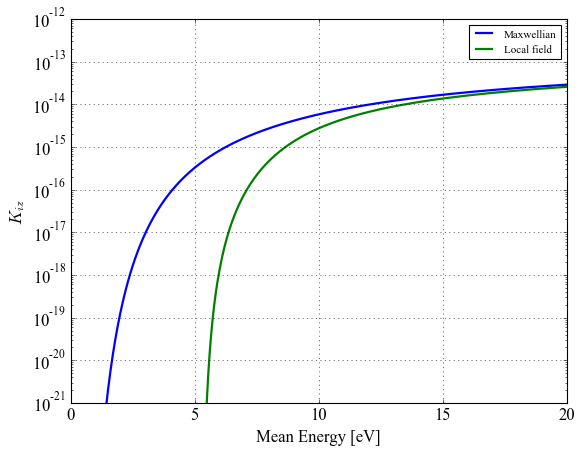

In [63]:
f, ax = plt.subplots()

ax.plot(3./2.*sigma_en_eff.Temperature, sigma_en_iz.K, label = "Maxwellian")
ax.plot(3./2.*sigma_en_eff.Temperature, Kiz_LF, label = "Local field")

# ax.plot(3./2.*sigma_en_eff.Temperature, P_loss_LF, label = "Local field")
# ax.plot(3./2.*sigma_en_eff.Temperature, 5./3.*D, label = "Maxwellian Const Freq.")
ax.set_ylabel(r'$K_{iz}$')
ax.set_xlabel(r'Mean Energy [eV]')
ax.set_yscale('log')
# ax.set_xlim([1., 20])
ax.set_ylim([1.e-21, 1e-12])
plt.legend(loc = 'best', fontsize = 10)
ax.grid(True)
#plt.savefig("/Users/alaguna/Documents/16_PostDoc/77_MomentMethodsPaper/Figures/Omega11_elec.pdf", bbox_inches='tight')



plt.show()
# print("D_eps = ", D_eps)

In [95]:
D_ov_mu_LF = np.zeros_like(sigma_en_eff.Temperature)
Deps_ov_mueps_LF = np.zeros_like(sigma_en_eff.Temperature)
D_ov_Deps_LF = np.zeros_like(sigma_en_eff.Temperature)
mu_ov_mueps_LF = np.zeros_like(sigma_en_eff.Temperature)

for i, i_D_LF in enumerate(D_LF):
    
    D_ov_mu_LF[i] = D_LF[i]/mu_LF[i]
    Deps_ov_mueps_LF[i] = D_eps_LF[i]/mu_eps_LF[i]
    D_ov_Deps_LF[i] = D_eps_LF[i]/D_LF[i]
    mu_ov_mueps_LF[i] = mu_eps_LF[i]/mu_LF[i]
    

Text(0.5, 0, '$T_e$ [eV]')

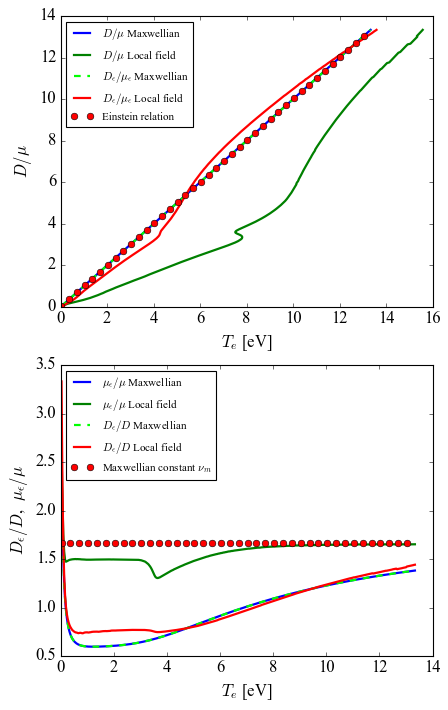

In [125]:
import matplotlib.colors as mcolors

f, ax = plt.subplots(2,1, figsize=(6,10))

ax[0].plot(D/mu, sigma_en_eff.Temperature, label = "$D/\mu$ Maxwellian")
ax[0].plot(D_ov_mu_LF, sigma_en_eff.Temperature, label = "$D/\mu$ Local field")

ax[0].plot(D_eps/mu_eps, sigma_en_eff.Temperature, "--", color='lime', label = "$D_\epsilon/\mu_\epsilon$ Maxwellian")
ax[0].plot(Deps_ov_mueps_LF, sigma_en_eff.Temperature, label = "$D_\epsilon/\mu_\epsilon$ Local field")

ax[0].plot(sigma_en_eff.Temperature, sigma_en_eff.Temperature, linestyle='None',color='red', marker='o', markevery=10, label = "Einstein relation")
ax[0].set_xlabel(r'$T_e$ [eV]')
ax[0].set_ylabel(r'$D/\mu$')


ax[1].plot(sigma_en_eff.Temperature, mu_eps/mu, label = "$\mu_\epsilon/\mu$ Maxwellian")
ax[1].plot(sigma_en_eff.Temperature, mu_ov_mueps_LF, label = "$\mu_\epsilon/\mu$ Local field")

ax[1].plot(sigma_en_eff.Temperature, D_eps/D, "--",color='lime',  label = "$D_\epsilon/D$ Maxwellian")
ax[1].plot(sigma_en_eff.Temperature, D_ov_Deps_LF,  label = "$D_\epsilon/D$ Local field")

ax[1].plot(sigma_en_eff.Temperature, 5./3.*np.ones_like(sigma_en_eff.Temperature), linestyle='None',color='red', marker='o', markevery=10, label = "Maxwellian constant $\\nu_m$")

ax[1].set_ylabel(r'$D_\epsilon/D$,  $\mu_\epsilon/\mu$')

ax[0].legend(loc="upper left", fontsize=10)
ax[1].legend(loc="upper left", fontsize=10)
ax[1].set_xlabel(r'$T_e$ [eV]')
# f.suptitle("Maxwellian with real cross section")
# ax[1].plot(D_eps/mu_eps, sigma_en_eff.Temperature, "--")
# ax[1].plot(sigma_en_eff.Temperature, sigma_en_eff.Temperature, linestyle='None', marker='o', markevery=10)

# Write the file

In [42]:
with open("./CoeffsMaxwellian.csv",'w') as file:
    header = ["T_e", "E", "K_iz", "PowerLoss", "D", "mu","D_eps", "mu_eps"]
    writer = csv.writer(file, delimiter='\t',lineterminator='\n',)
    writer.writerow(header)
    for i_Temp, Temp in enumerate(sigma_en_iz.Temperature):
        line = [Temp, 3./2.*sigma_en_iz.Temperature[i_Temp], sigma_en_iz.K[i_Temp], Source_energy[i_Temp], D[i_Temp], mu[i_Temp], D_eps[i_Temp], mu_eps[i_Temp]]
        writer = csv.writer(file, delimiter='\t',lineterminator='\n',)
        writer.writerow(line)

In [49]:
for K in mu_eps:
    print(K, end=", ")

4.0627932650804106e+26, 5.9804773664906895e+26, 4.839577900546708e+26, 3.556687460336782e+26, 2.61638432174121e+26, 1.9696991831696958e+26, 1.5233094249117671e+26, 1.2085598524096792e+26, 9.809486870271383e+25, 8.121982404785971e+25, 6.841608156440863e+25, 5.849589753959586e+25, 5.066429634671229e+25, 4.437708419260587e+25, 3.9253641053668165e+25, 3.502234763905288e+25, 3.1485731800287753e+25, 2.8497749393645317e+25, 2.594867942064489e+25, 2.3754891428408923e+25, 2.185179029885524e+25, 2.018887097360252e+25, 1.872619844222527e+25, 1.7431866098467905e+25, 1.6280135889424757e+25, 1.5250060332608052e+25, 1.4324449626631577e+25, 1.3489088978672955e+25, 1.273213947264868e+25, 1.2043675043665726e+25, 1.1415321422388184e+25, 1.0839972215059883e+25, 1.0311563866372714e+25, 9.82489595927075e+24, 9.375486706488016e+24, 8.959455969414602e+24, 8.573429966245758e+24, 8.21446318766715e+24, 7.879974053908086e+24, 7.567691613452007e+24, 7.275611166491735e+24, 7.001957142543346e+24, 6.745151905784304e+

In [122]:
for printing in mu_eps_LF_Fake:
    print(printing, end=", ")

2.366666666666667e+26, 2.895e+26, 2.875e+26, 2.5799999999999998e+26, 2.101666666666667e+26, 1.5851666666666668e+26, 1.1781666666666667e+26, 9.021666666666668e+25, 7.166666666666667e+25, 5.875e+25, 4.945e+25, 4.25e+25, 3.7133333333333332e+25, 3.2916666666666665e+25, 2.951666666666667e+25, 2.6733333333333337e+25, 2.441666666666667e+25, 2.246666666666667e+25, 2.0766666666666665e+25, 1.9300000000000003e+25, 1.8e+25, 1.6833333333333337e+25, 1.5793333333333334e+25, 1.4848333333333333e+25, 1.3986666666666668e+25, 1.3200000000000002e+25, 1.2478333333333335e+25, 1.1816666666666668e+25, 1.1206666666666668e+25, 1.0643333333333334e+25, 1.0125e+25, 9.645e+24, 9.201666666666668e+24, 8.791666666666667e+24, 8.410000000000001e+24, 8.056666666666666e+24, 7.726666666666667e+24, 7.418333333333334e+24, 7.131666666666667e+24, 6.863333333333333e+24, 6.611666666666667e+24, 6.375e+24, 6.153333333333333e+24, 5.945e+24, 5.746666666666667e+24, 5.56e+24, 5.385e+24, 5.216666666666667e+24, 5.058333333333334e+24, 4.9